In [1]:
# Source for data used: https://www.kaggle.com/datasets/prasertk/best-tv-shows-of-all-time

"""
The purpose of this project is to analyze the metascore and user score of the 100 highest rated tv shows
and see if there are any outliers, i.e. shows with a high metascore but low user score.
"""  
import pandas as pd
import sqlite3 as sql
import numpy as np
import matplotlib.pyplot as plt

In [2]:
database = "tv_shows.db"
connection = sql.connect(database)

In [3]:
# Let's only choose the columns containing the metascore and user score
query = """SELECT field2, metascore, user_score
FROM best_tv_shows
limit 100 OFFSET 1"""

In [8]:
df = pd.read_sql_query(query, connection)
# Remove the rows that contain "tbd" as a value
df = df[df.user_score != "tbd"]

In [9]:
df['metascore'] = np.float64(df['metascore'])
df['user_score'] = np.float64(df['user_score'])

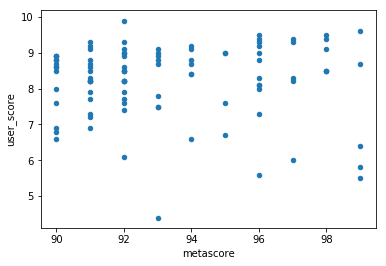

In [10]:
# Let's visualize the user score and metascore of each tv show to determine any outliers
df.plot.scatter(x = "metascore", y ='user_score')

In [13]:
"""
Let's take a closer look at which tv shows are outliers when it comes to the difference between the metascore and user score
Using an user score of 7 as the threshold for outliers is good enough for this purpose
""" 

"\nLet's take a closer look at which tv shows are outliers when it comes to the difference between the metascore and user score\nUsing an user score of 7 as the threshold for outliers is good enough for this purpose\n"

In [14]:
# Dictionary, which contains the user score as the key and an array containing the show's name and its metascore as the value
user_score_of_show = {}

for index, i in enumerate(df['user_score']):
    if (i<7):
        user_score_of_show[i]=[df['field2'][index], df['metascore'][index]]


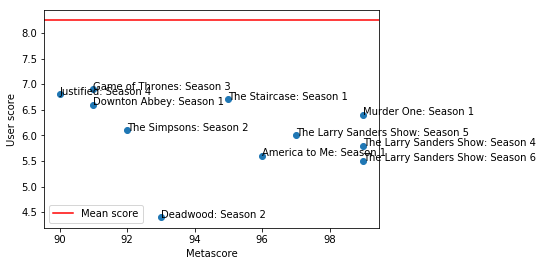

In [15]:
# Let's compare the mean user score and the outliers' user score
# Mean score will be represented as a horizontal line so then the difference is easier to see
mean = df["user_score"].mean()

# Dictionary's values 2nd index contains the metascore
x = [i[1] for i in user_score_of_show.values()]

# Dictionary's key is the user score
y = [i for i in user_score_of_show]

# The first index of dictionary's value is the show's name, which we can use as the annotation
annotations = [i[0] for i in user_score_of_show.values()]

for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
    
plt.xlabel("Metascore")
plt.ylabel("User score")
plt.axhline(y = mean, color='r', label="Mean score")
plt.legend(loc = 'best')
plt.scatter(x, y)
plt.show()